In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic_dataset.csv")

# Data Cleaning

In [4]:
# Display the first few rows of the dataset to understand its structure
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Fill missing values in the 'Age' column with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [6]:
# Drop the 'Cabin' column because it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [7]:
# Drop rows where 'Embarked' is missing
df.dropna(subset=['Embarked'], inplace=True)

In [8]:
# Map 'Sex' to numerical values: male -> 0, female -> 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [9]:
# Map 'Embarked' to numerical values: C -> 0, Q -> 1, S -> 2
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# Exploratory Data Analysis (EDA)

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,0.363636,29.599282,0.447368,0.392344,35.627188,1.401914
std,120.810458,0.481622,0.841838,0.481622,12.703770,0.896760,0.981429,55.907576,0.854496
min,892.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,2.000000
75%,1204.750000,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


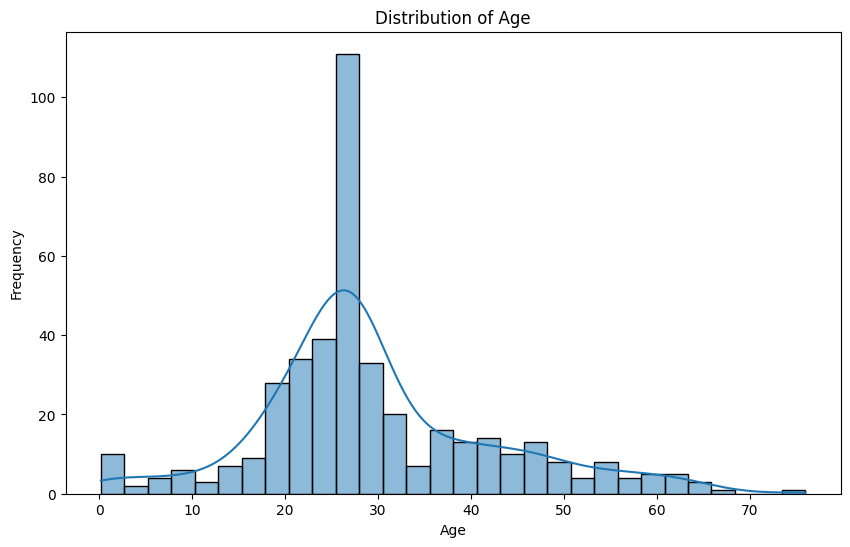

In [11]:
# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)  # KDE adds a line to show the distribution shape
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

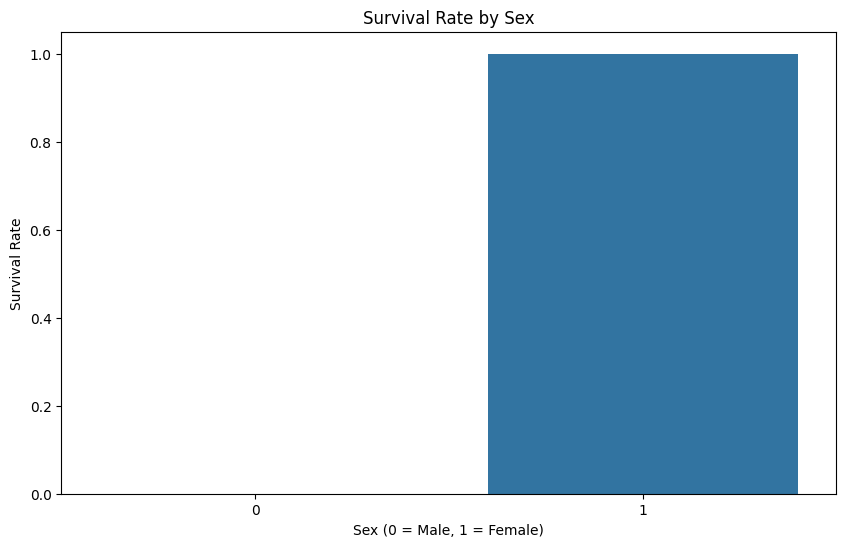

In [12]:
# Plot the survival rate by 'Sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)  # Bar plot shows the average survival rate for each sex
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

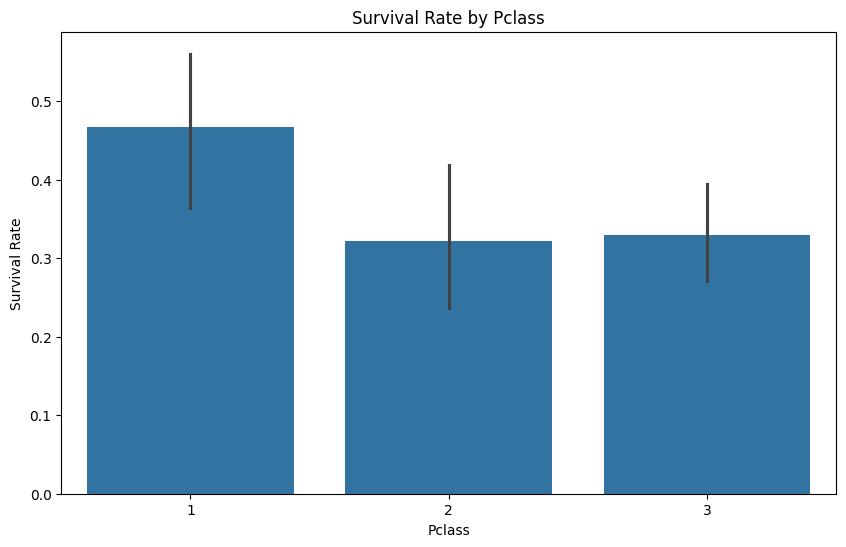

In [13]:
# Plot the survival rate by 'Pclass' (passenger class)
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)  # Bar plot shows the average survival rate for each class
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

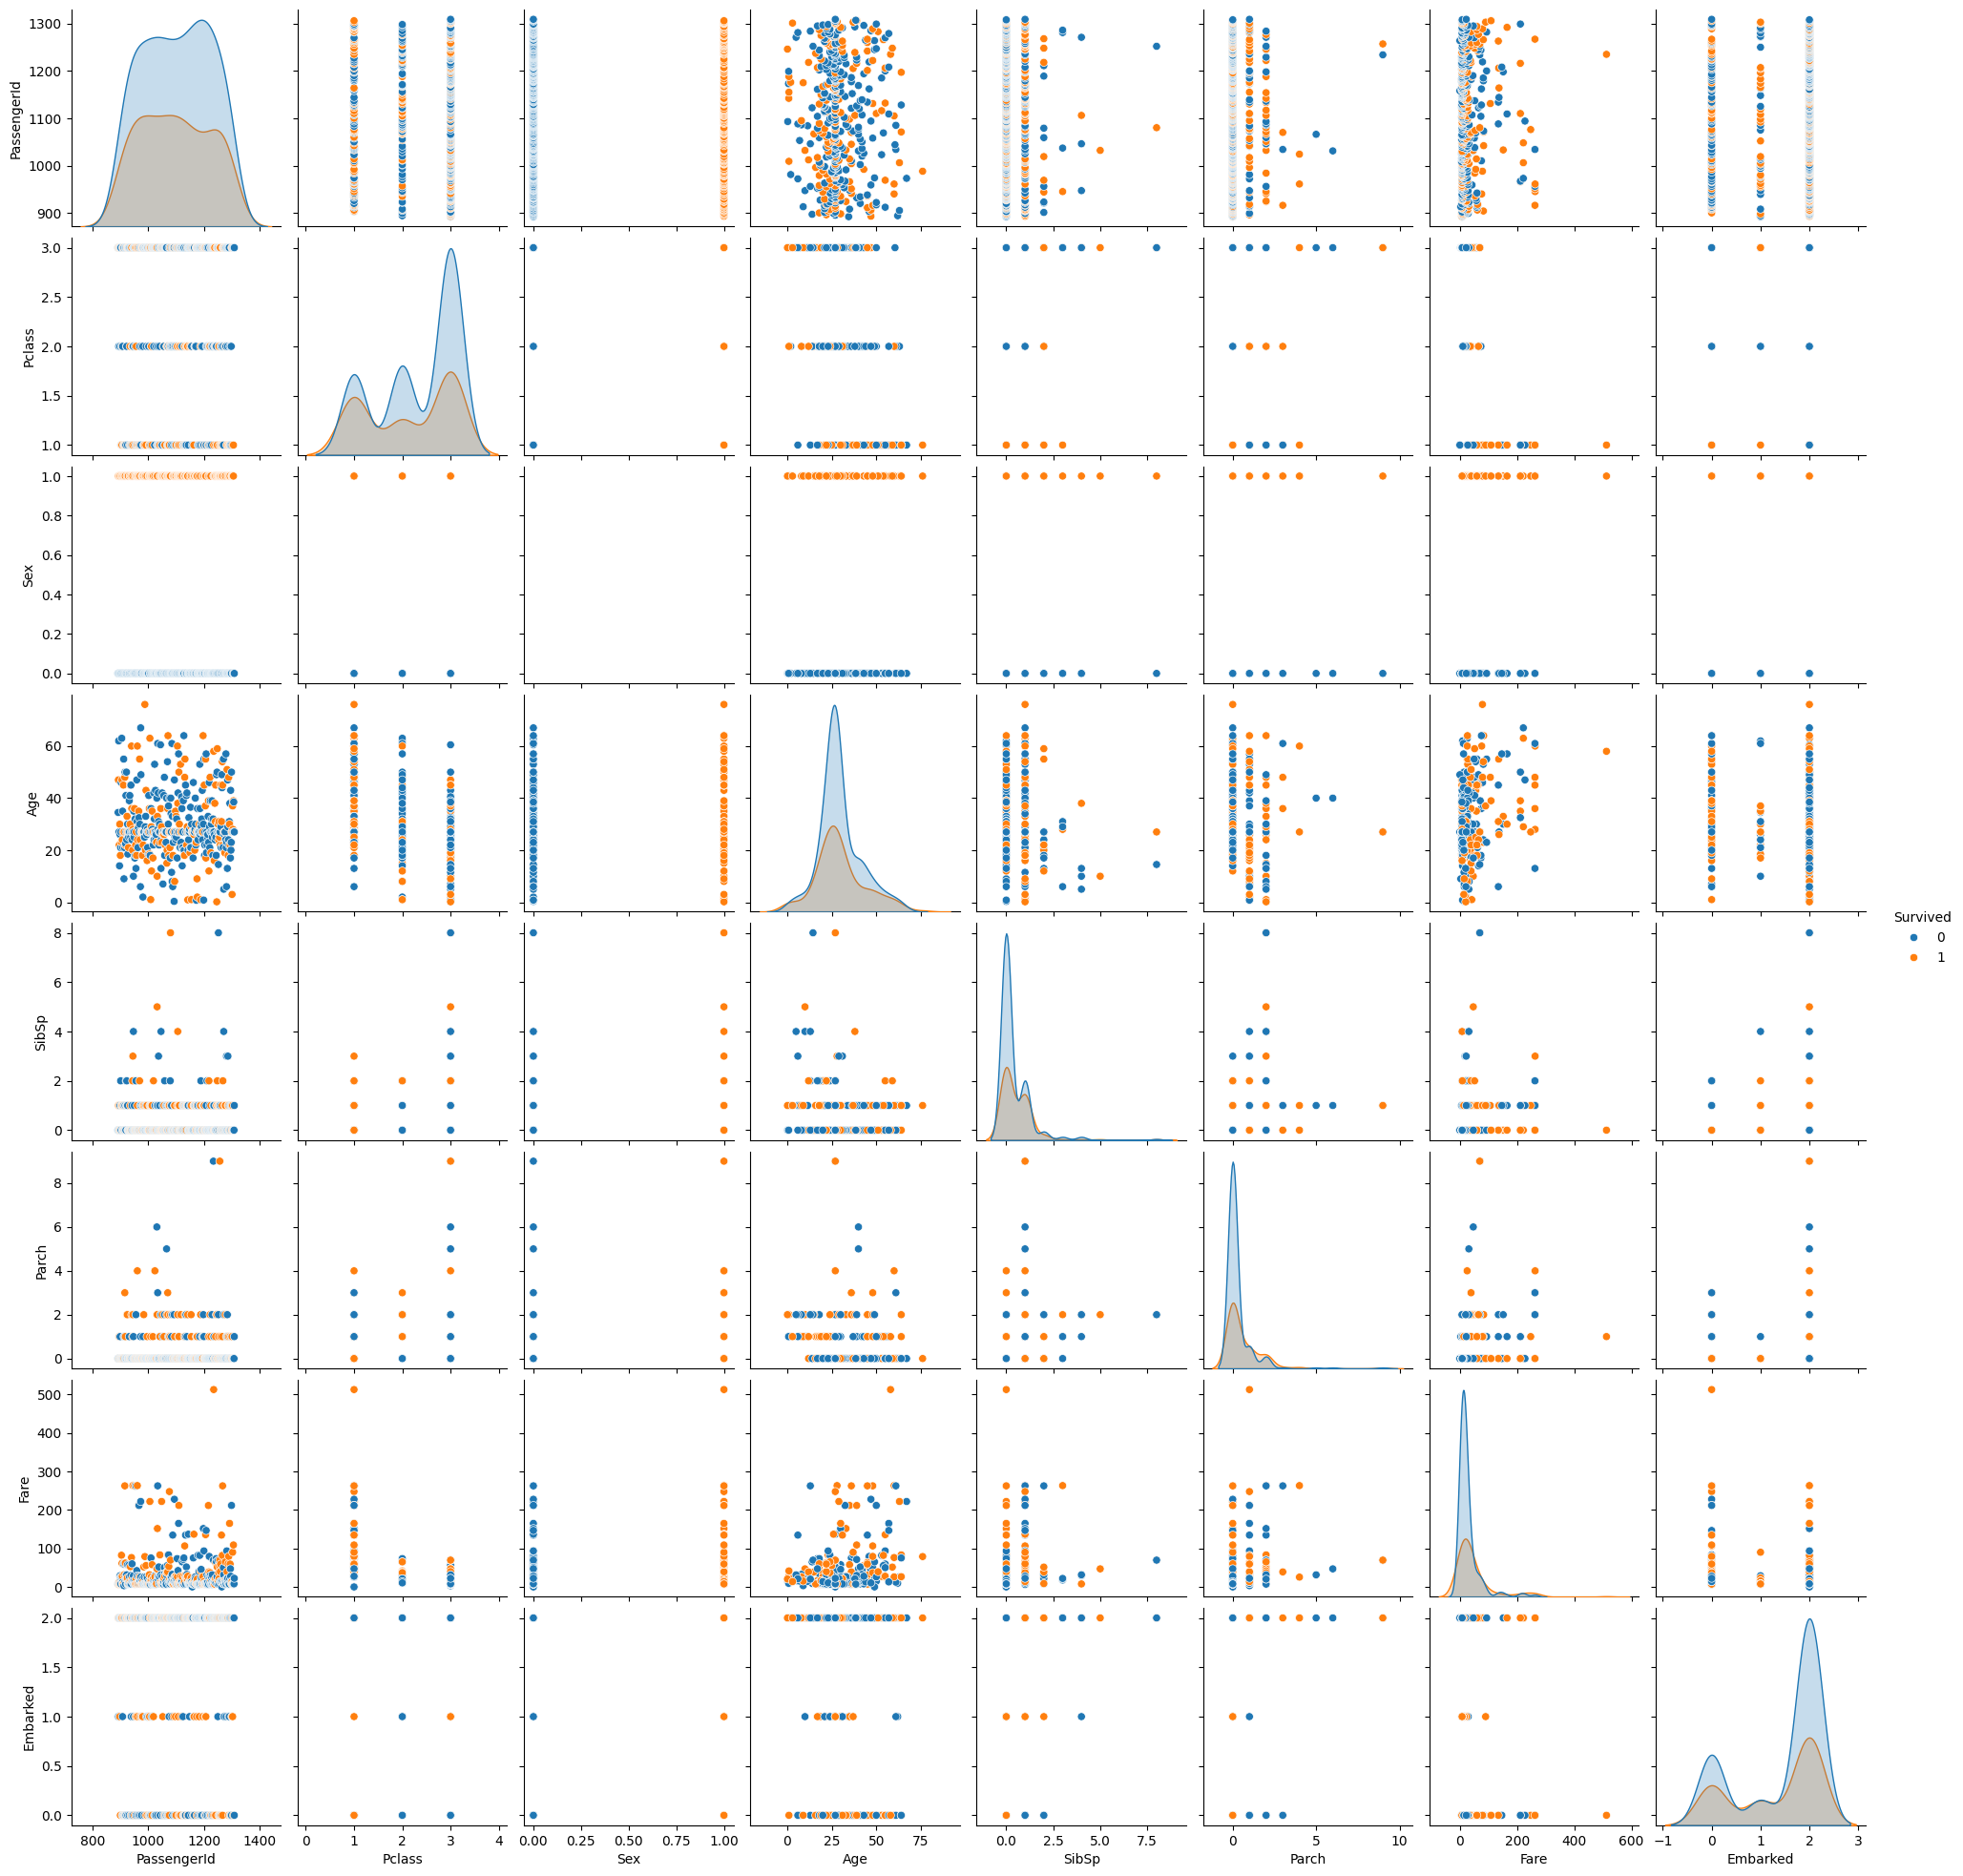

In [14]:
# Create a pairplot to visualize relationships between multiple variables
sns.pairplot(df, hue='Survived')  # Hue adds a color dimension based on the 'Survived' column
plt.show()